# GeoPandas and Choropleth maps

The main purpose of this notebook is to introduce the Python GeoPandas module; the <b>first section</b> describes it briefly. The <b>second section</b> is a demo of GeoPandas using data from the Committee to Protect Journalists (CPJ), mapped using the pyplot collection from Matplotlib.

Since GeoPandas is all about geospatial data and maps, I thought it would be a good opportunity to also introduce choropleth maps, and bivariate choropleth maps as useful visualization techniques. They're explained in the <b>third section</b>, where I use data from the Economist Intelligence Unit (EIU) Democracy Index, in addition to the CPJ data.

## 1- Visualization Library: GeoPandas

GeoPandas is an open-source library for manipulating - and ultimately plotting - <b>geospatial data</b>. By geospatial, I mean more than just coordinates or locations, but also related information, such as shapes, areas or outlines.

You can think of GeoPandas as an extension to Pandas, with specialized data structures containing geometric data. So Python is considered to be a procedural programming language, while Pandas and GeoPandas are libraries written for Python, and more limited to the definitions of data structures and the operations on them.

GeoPandas works at its core with <b>geopandas.GeoSeries</b> and <b>geopandas.GeoDataFrames</b>. From the addition of the prefix ‘Geo’ you can guess that these are subclasses of regular <b>pandas.Series</b> and <b>pandas.DataFrames</b>. A GeoDataFrame looks like the following:

<img src='https://drive.google.com/uc?id=1PZ4hj4_12rVGh3RSMyYFljHgzYtjmZIp'/>

It’s composed of  regular Pandas index and data columns, but has geometric data included as separate columns. In fact, all of this can be manipulated as you would a regular DataFrame, but once you declare or change its type to a GeoDataFrame, the geometry columns are recognized as GeoSeries.

A little more detail: As I mentioned above, there can be <b>more than one type</b> of geospatial data, so a GeoDataFrame can have more than one GeoSeries, for example, one containing coordinates and another containing shapes. One GeoSeries is recognized as the <b>‘active’</b> geometry, but that can also be changed.

One very useful operation that can be performed using those types of GeoSeries is a <b>spatial join (sjoin)</b>. For example, if one dataframe has a column of city coordinates, and the other has a column of country shapes, they can be joined using the 'within' predicate to find the country within which a city lies. (See this link for more information: https://geopandas.org/en/stable/gallery/spatial_joins.html)

There are some other differences compared to pandas. For example, you can open and read files directly into a geopandas.GeoDataFrame if they are formatted accordingly, but to read a CSV or Excel file, you first have to read it into a pandas.DataFrame, then convert it.

We’ll see more of this with examples in the demonstration below. For information on installation and use, including a tutorial, go to https://geopandas.org/

### Installation and getting started

First, you need to make sure it is installed on your computer. That’s easily done in one step. If you’re in a Jupyter notebook, type the following:

In [ ]:
# I have it commented out here because it's already installed.
# You'll know it's not installed if you get an error importing
# geopandas in the next cell.

#!pip install geopandas

Then you can import GeoPandas normally. You'll recognize the other modules; 'make_axes_locatable' helps with map legends.

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Comment out the second line to see warnings
import warnings
warnings.filterwarnings('ignore')

#Constants
dataPath = 'data/'

## 2- Demonstration

I have been following the <b>Committee to Protect Journalists (CPJ)</b> for years. On Wikipedia, they are described as an American NGO, based in New York, that "promotes press freedom and defends the rights of journalists". Their site has some very sobering statistics on the hundreds of journalists who are attacked, imprisoned or killed worldwide every year.

In this demo, I want to recreate the following image from their website cpj.org:

<p align="center">
<img src='./images/CPJMissing.png' width="800" height="800"/>
</p>

The image has the title "65 Journalists Missing in 2021". The circles show the locations of the missing journalists, and the sizes of the circles correspond to the number missing at each location.

I was able to download the data, corresponding to the image, from their site, as a CSV file. I start by reading it into a DataFrame and checking its size.

In [ ]:
CPJMissing = pd.read_csv(dataPath + 'Journalists Missing in 2021.csv')
CPJMissing.shape

(65, 43)

### Data inspection and preparation

The number of entries seems right, but I don't need all these columns. By checking the column names, I find that I only need the 'country' and 'fullName' columns. Then I can use 'groupby' to get the number of people missing in each country.

In [ ]:
CPJMissing.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2021,Missing,Acquitté Kisembo,NaN,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Missing,Ahmed Al-Dulami,NaN,Iraq,NaN,NaN,Male,https://cpj-photos.s3.us-west-2.amazonaws.com/...,Raad Abu Ezz al-Din al-Dulami,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Missing,Alfredo Jiménez Mota,NaN,Mexico,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Missing,Ali Astamirov,NaN,Russia,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,Missing,Andrei Bazvluk,NaN,Ukraine,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
CPJMissing.columns

Index(['year', 'combinedStatus', 'fullName', 'sortName', 'primaryNationality',
       'secondaryNationality', 'tertiaryNationality', 'gender', 'photoUrl',
       'photoCredit', 'type', 'lastStatus', 'typeOfDeath', 'status',
       'employedAs', 'organizations', 'jobs', 'coverage', 'mediums', 'country',
       'location', 'region', 'state', 'locality', 'province', 'localOrForeign',
       'sourcesOfFire', 'motiveConfirmed', 'accountabilityCrossfire',
       'accountabilityAssignment', 'impunityMurder', 'tortured', 'captive',
       'threatened', 'charges', 'motive', 'lengthOfSentence', 'healthProblems',
       'impCountry', 'entry', 'sentenceDate', 'sentence',
       'locationImprisoned'],
      dtype='object')

In [ ]:
MissingDF = CPJMissing[['country', 'fullName']]
MissingDF.head()

,country,fullName
0,Democratic Republic of the Congo,Acquitté Kisembo
1,Iraq,Ahmed Al-Dulami
2,Mexico,Alfredo Jiménez Mota
3,Russia,Ali Astamirov
4,Russia,Andrei Bazvluk


In [ ]:
# This gives me the data I need to map
MissingCountDF = MissingDF.groupby(['country']).size().reset_index(name='counts')
MissingCountDF

,country,counts
0,Algeria,3
1,Burundi,1
2,China,1
3,Democratic Republic of the Congo,2
4,Egypt,1
5,French Polynesia,1
6,Haiti,1
7,Indonesia,1
8,Iraq,9
9,Ivory Coast,1


### Geospatial data

GeoPandas has a few useful datasets available. One of them has data for a GeoDataFrame containing a GeoSeries with geometry for a map of the world, down to the level of each country. It also has country and continent names, population estimates and GDP estimates.

In [ ]:
# Read the file into a GeoDataFrame
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

# I have no data in Antarctica, and the map looks better without it
world = world[world.continent != 'Antarctica']
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Merging the datasets

Now I need to merge the two datasets to get a single dataset with country names, the number of journalists missing in the country, and geometry information for the country. This way I can place markers at the correct locations, and size the markers according to the counts.

Note that the way I merge the data results in a DataFrame, and not a GeoDataFrame. Reversing the left and right datasets would have resulted in a GeoDataFrame. I do it this way so I can show how to convert a DataFrame to a GeoDataFrame. In the third section, when I look at choropleth maps, I do it the more direct way.

In [ ]:
# Merge the frames on country names
MissingDF = MissingCountDF.merge(world[['name', 'geometry']], how='inner',
                            left_on='country', right_on='name')
MissingDF.shape

(19, 4)

In [ ]:
# There are only 19 entries and there were 23 above, so it seems I've
# lost 4 in the merge. The problem is probably because of mismatches
# in country names.

# Doing another merge of the resulting dataframe with the original data
# shows which countries are missing
(MissingCountDF.merge(MissingDF, on='country', how='left', indicator=True)
                      .query('_merge == "left_only"')
                      .drop('_merge', 1))

,country,counts_x,counts_y,name,geometry
3,Democratic Republic of the Congo,2,NaN,NaN,None
5,French Polynesia,1,NaN,NaN,None
9,Ivory Coast,1,NaN,NaN,None
17,Serbia and Montenegro,1,NaN,NaN,None


In [ ]:
# So I search the original GeoDataFrame for leads or alternate spellings
world[world['name'].str.contains("Congo|Polynesia|Francaise|Ivory|Ivoir|Serbia|Montenegro")]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
60,25716544.0,Africa,Côte d'Ivoire,CIV,58539,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738..."
67,5380508.0,Africa,Congo,COG,12267,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ..."
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."


In [ ]:
# Sure enough, I find that DRCongo is abbreviated, Ivory Coast is in
# French, and Serbia and Montenegro are separate (which is correct);
# the DataFrame has older data. But I still can't find anything on
# French Polynesia.

# I know it's in the South Pacific, so I find all the countries in the
# GeoDataFrame that are nearby, then I use Google Maps to find that Fiji
# is the closest.
tempDF = world[world['continent'] == 'Oceania']
tempDF

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
89,299882.0,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
134,287800.0,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."
135,669823.0,Oceania,Solomon Is.,SLB,1589,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."
136,4917000.0,Oceania,New Zealand,NZL,206928,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802..."
137,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


In [ ]:
# So I adjust the data in the DataFrame
MissingCountDF['country'][3] = 'Dem. Rep. Congo'
MissingCountDF['country'][5] = 'Fiji'
MissingCountDF['country'][9] = "Côte d'Ivoire"
MissingCountDF['country'][17] = 'Serbia'

In [ ]:
# Redo the merge, and this time get the correct number of entries
MissingDF = MissingCountDF.merge(world[['name', 'geometry']], how='inner',
                            left_on='country', right_on='name').drop('name', 1)
MissingDF

,country,counts,geometry
0,Algeria,3,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
1,Burundi,1,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762..."
2,China,1,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
3,Dem. Rep. Congo,2,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
4,Egypt,1,"POLYGON ((36.86623 22.00000, 32.90000 22.00000..."
5,Fiji,1,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
6,Haiti,1,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
7,Indonesia,1,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
8,Iraq,9,"POLYGON ((39.19547 32.16101, 38.79234 33.37869..."
9,Côte d'Ivoire,1,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738..."


In [ ]:
# Note that this is a pandas.DataFrame. I need a geopandas.GeoDataFrame
# so I can make use of the interface with Matplotlib to draw the map,
# and to get coordinates to locate the data markers.
type(MissingDF)

pandas.core.frame.DataFrame

In [ ]:
# This creates a GeoDataFrame from the DataFrame. It's a good idea to
# designate a Coordinate Reference System (CRS) so that maps on the
# same plot align. Note that I also specify which is the geometry column.
MissingGeoDF = gpd.GeoDataFrame(MissingDF, crs={'init':'epsg:4326'}, geometry=MissingDF['geometry'])

# To plot the data more easily, I create a column of centroids from
# the geometry column, and set that as the active geometry. Note
# that the active geometry column doesn't have to be called 'geometry'.
MissingGeoDF['centroids'] = MissingGeoDF['geometry'].centroid
MissingGeoDF = MissingGeoDF.set_geometry('centroids')
MissingGeoDF

,country,counts,geometry,centroids
0,Algeria,3,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",POINT (2.59805 28.18548)
1,Burundi,1,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...",POINT (29.91389 -3.37739)
2,China,1,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",POINT (103.88361 36.55507)
3,Dem. Rep. Congo,2,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",POINT (23.58296 -2.85028)
4,Egypt,1,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",POINT (29.84446 26.50662)
5,Fiji,1,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
6,Haiti,1,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",POINT (-72.65801 18.90070)
7,Indonesia,1,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",POINT (117.42341 -2.22174)
8,Iraq,9,"POLYGON ((39.19547 32.16101, 38.79234 33.37869...",POINT (43.75691 33.03682)
9,Côte d'Ivoire,1,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738...",POINT (-5.61204 7.55376)


In [ ]:
# Now it's a GeoDataFrame
type(MissingGeoDF)

geopandas.geodataframe.GeoDataFrame

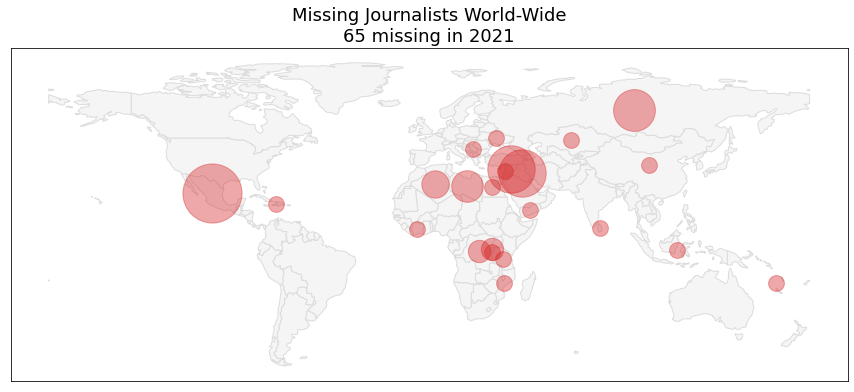

In [ ]:
# The data can now be plotted. First the world map is drawn in
# a very light grey with slightly darker edges.
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_xticks([])
ax.set_yticks([])
plt.title('Missing Journalists World-Wide\n65 missing in 2021', fontsize=18)
world.plot(ax=ax, color='whitesmoke', edgecolor='gainsboro')

# Then a scatter plot is made of the data, where the x and y
# coordinates are obtained from the centroids. The size of each
# marker is found through trial and error to be 250 time the count.
for i in range(len(MissingGeoDF)):
    xval = MissingGeoDF['centroids'].iloc[i].centroid.x
    yval = MissingGeoDF['centroids'].iloc[i].centroid.y
    ax.scatter(xval, yval, marker='o', c='tab:red', s=MissingGeoDF['counts'].iloc[i]*250, alpha=0.4)

plt.savefig('images/CPJMissingSaved.png')

Here's the original map for comparison:

<p align="center">
<img src='./images/CPJMissing.png' width="800" height="800"/>
</p>

It looks pretty close. The sizes for the smaller circles are at a different scale, and the locations are slightly off for some markers, but still within the same country. But I also noticed that I was able to include two markers - Serbia and French Polynesia (set at Fiji) - that are missing from the original.

## 3- Visualization Technique: Choropleth Maps

Finally, I'd like to quickly present choropleth maps. You must have seen these a lot of times, but nobody bothered to use that name. They are maps in which designated areas are colored or patterned in proportion to a variable. Think of all the maps showing which areas voted Democrat or Republican. This map from Wikipedia, for example, shows the percentage of Australians by region in the 2011 census who identified as Anglican:

<p align="center">
<img src='./images/Australian2011AnglicanWide.png' width="800" height="800"/>
</p>

Note that the correct way to show population data in a choropleth map is to show <b>proportions</b> and not totals. Showing totals will always show higher numbers where population density is higher, so all choropleth maps of the same country will look the same regardless of the variable being measured. Normalizing by the population, however, will show the concentration of the variable.

In this demonstration, I don't need to normalize since I actually want to display totals, not percentages.

### Single variable map

Here, I want to plot the missing journalist data as a choropleth map. That is the default map when you give Matplotlib a GeoDataFrame where the active geometry column contains spatial objects. If the active geometry column contains centroids, as we had in the demonstration, the plot would just show points, and not filled-in areas.

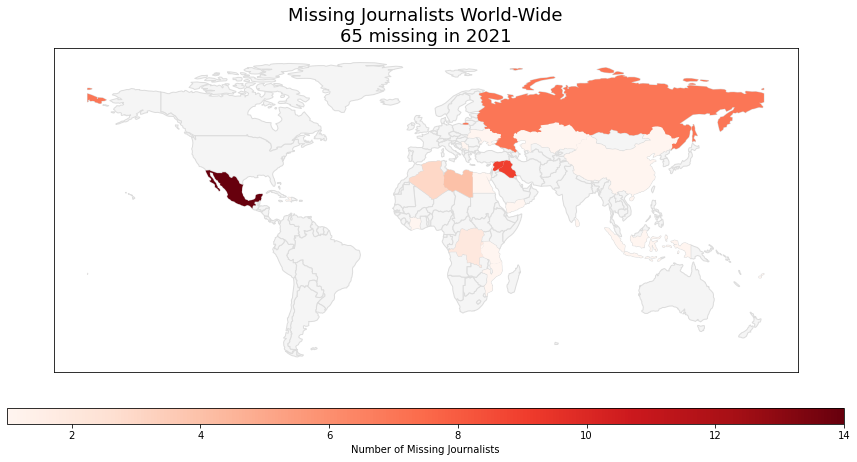

In [ ]:
# So set up the plot
fig2, ax2 = plt.subplots(1, 1, figsize=(15,15))
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Missing Journalists World-Wide\n65 missing in 2021', fontsize=18)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

# Create the map, set the active geometry to the column
# containing spatial objects, then plot the data
world.plot(ax=ax2, color='whitesmoke', edgecolor='gainsboro')
MissingGeoDF = MissingGeoDF.set_geometry('geometry')
MissingGeoDF.plot(column='counts', ax=ax2, cmap='Reds',
                  legend=True,
                  legend_kwds={'label': "Number of Missing Journalists",
                                'orientation': "horizontal"}, cax=cax);

Although, thankfully, there aren't more missing journalists, this map isn't very visually appealing because the data leaves out most of the countries. The scatter plot above looks better when the data is geographically sparse.

### EIU Democracy Index data

Another dataset, the Economist Intelligence Unit's Democracy Index, has more data and covers most countries.

In [ ]:
#DemIndDF = pd.read_excel('EIU Democracy Indices Dataset v3.xlsx', 'data-for-countries-etc-by-year')
DemIndDF = pd.read_csv(dataPath + 'EIU Democracy Indices Dataset v3.csv')
DemIndDF.head()

,geo,name,time,Democracy index (EIU),Electoral pluralism index (EIU),Government index (EIU),Political participation index(EIU),Political culture index (EIU),Civil liberties index (EIU),Change in democracy index (EIU)
0,afg,Afghanistan,2006.0,30.6,61.70,0.00,22.2,25.0,44.10,NaN
1,afg,Afghanistan,2007.0,30.4,56.70,3.95,22.2,25.0,44.10,-0.2
2,afg,Afghanistan,2008.0,30.2,51.70,7.90,22.2,25.0,44.10,-0.2
3,afg,Afghanistan,2009.0,27.5,38.35,7.90,25.0,25.0,41.15,-2.7
4,afg,Afghanistan,2010.0,24.8,25.00,7.90,27.8,25.0,38.20,-2.7


In [ ]:
DemIndDF.shape

(2669, 10)

In [ ]:
# Select data for 2019, the most recent in the table and the country
# abbreviation and index columns
DemIndDF = DemIndDF[DemIndDF.time == 2019]
DemIndDF = DemIndDF[['geo', 'Democracy index (EIU)']]
DemIndDF.head()

,geo,Democracy index (EIU)
13,afg,28.5
27,alb,58.9
41,dza,40.1
55,ago,37.2
69,arg,70.2


In [ ]:
# Country abbreviations need to be capitalized so we get matches on
# merging. These are ISO 3-letter country codes, by the way, so we
# can expect them to match those in the geopandas dataset. Also check
# the size of the data.
DemIndDF['geo'] = DemIndDF['geo'].str.upper()
DemIndDF.shape

(167, 2)

In [ ]:
# The geopandas dataset has more entries, so we will lose some data on
# the merge, but that's good enough for this demonstration.
world2 = world[['iso_a3', 'geometry']]
world2.shape

(176, 2)

In [ ]:
# Merge the datasets, while dropping one of the country code columns.
# Also create a column with centroids to use later in the plot.
# It doesn't have to be designated as the active geometry since it's
# only being used for a scatter plot.
DemIndPlot = world2.merge(DemIndDF, left_on='iso_a3', right_on='geo').drop('iso_a3', 1)
DemIndPlot['centroids'] = DemIndPlot['geometry'].centroid
DemIndPlot.shape

(160, 4)

In [ ]:
# As expected, we lose some data, but that's fine for the demo. Note
# that because of the order of the merge, the result is a GeoDataFrame.
type(DemIndPlot)

geopandas.geodataframe.GeoDataFrame

In [ ]:
DemIndPlot.head()

,geometry,geo,Democracy index (EIU),centroids
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,58.5,POINT (163.85316 -17.31631)
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,51.6,POINT (34.75299 -6.25773)
2,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,92.2,POINT (-98.14238 61.46908)
3,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,79.6,POINT (-112.59944 45.70563)
4,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,29.4,POINT (67.28461 48.19166)


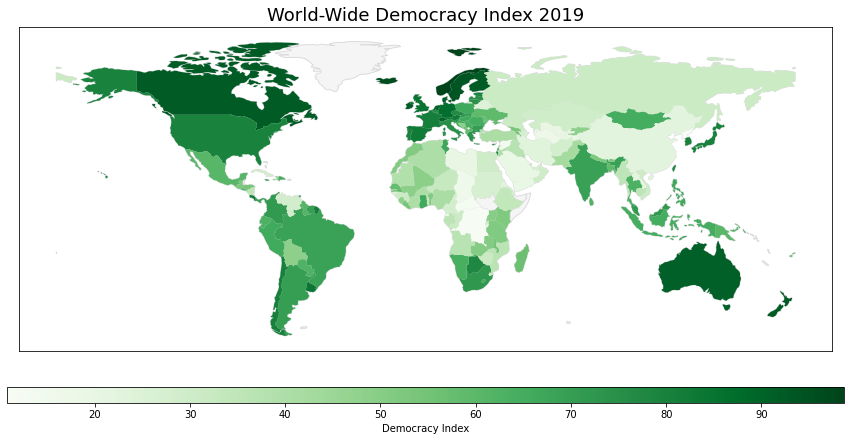

In [ ]:
# Create the plot
fig3, ax3 = plt.subplots(1, 1, figsize=(15,15))
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('World-Wide Democracy Index 2019', fontsize=18)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

world2.plot(ax=ax3, color='whitesmoke', edgecolor='gainsboro')
DemIndPlot.dropna().plot(column='Democracy index (EIU)', ax=ax3, cmap='Greens',
                  legend=True,
                  legend_kwds={'label': "Democracy Index",
                                'orientation': "horizontal"}, cax=cax);

This looks more interesting; the data includes nearly all countries. If we had searched for the lost data points and made adjustments, we might have found the missing countries as well.

### Bivariate choropleth maps

An even more interesting use of choropleth maps is when they are used to track changes in two variables simultaneously. An interesting question would be: Would the number of missing journalists correlate with a lower democracy index rating?

Unfortunately, GeoPandas has no direct way to create a bivariate choropleth maps. It's not just a matter of overlaying two maps if you want it to be clear. For example, see this map, also from Wikipedia, from the US 2010 Census showing Black and Hispanic population proportions:

<p align="center">
<img src='./images/BlackHispanicBivariateWide.png' width="800" height="800"/>
</p>

You can see that the legend is 2-D so you can track changes in one population or the other or both.

### Workaround1: Overlay scatter plot

So one makeshift way around that limitation with GeoPandas is to overlay the EIU map with the scatter plot created earlier.

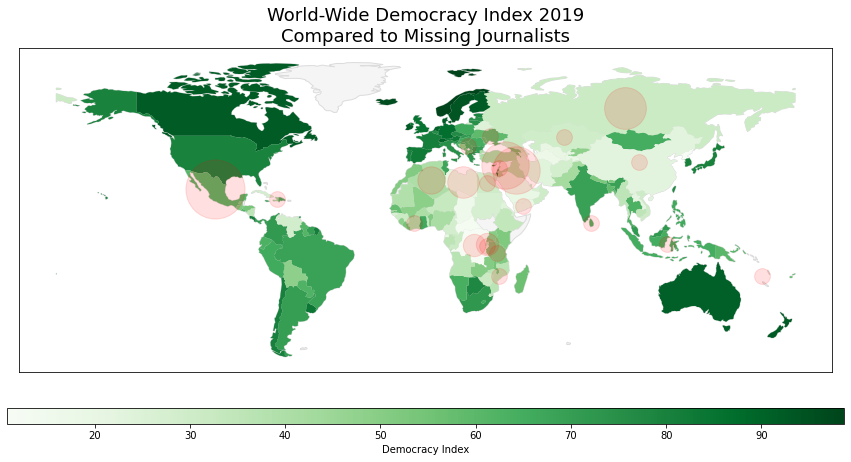

In [ ]:
fig3, ax3 = plt.subplots(1, 1, figsize=(15,15))
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('World-Wide Democracy Index 2019\nCompared to Missing Journalists', fontsize=18)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

world2.plot(ax=ax3, color='whitesmoke', edgecolor='gainsboro')
DemIndPlot.dropna().plot(column='Democracy index (EIU)', ax=ax3, cmap='Greens',
                  legend=True,
                  legend_kwds={'label': "Democracy Index",
                                'orientation': "horizontal"}, cax=cax)

for i in range(len(MissingGeoDF)):
    xval = MissingGeoDF['centroids'].iloc[i].centroid.x
    yval = MissingGeoDF['centroids'].iloc[i].centroid.y
    ax3.scatter(xval, yval, marker='o', c='r', s=MissingGeoDF['counts'].iloc[i]*250, alpha=0.125)

That conveys the information, more or less. But from a visualization design standpoint, it's doable, but difficult to make the comparison.

Note that the largest numbers of journalists went missing in countries with low democracy index ratings, which makes sense. The only exception is Mexico, which has a relatively high rating. Perhaps this is because most violence against journalists in that country is perpetrated by criminal organizatons, as opposed to autocratic governments.

### Workaround 2: Use hash marks

Another makeshift solution, using hash marks, loses some accuracy because of the limit on how many different markings can be used. Too many marking types make the visualization hard to understand.

In [ ]:
# Split the data into three groups
MissingGeoDF1 = MissingGeoDF[MissingGeoDF['counts'] <= 5]
MissingGeoDF2 = MissingGeoDF[(MissingGeoDF['counts'] >5) & (MissingGeoDF['counts'] <= 10)]
MissingGeoDF3 = MissingGeoDF[MissingGeoDF['counts'] >10]

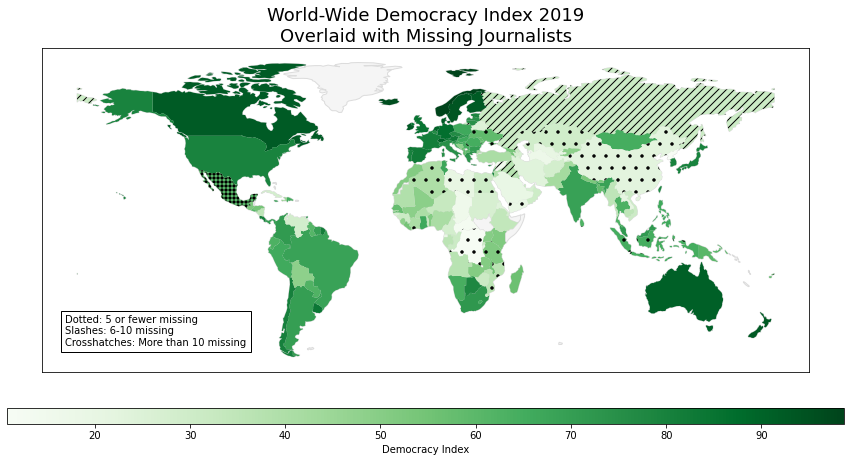

In [ ]:
# Create the plots and overlay hatch marks
fig4, ax4 = plt.subplots(1, 1, figsize=(15,15))
ax4.set_xticks([])
ax4.set_yticks([])
plt.title('World-Wide Democracy Index 2019\nOverlaid with Missing Journalists', fontsize=18)
divider = make_axes_locatable(ax4)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

world2.plot(ax=ax4, color='whitesmoke', edgecolor='gainsboro')
DemIndPlot.dropna().plot(column='Democracy index (EIU)', ax=ax4, cmap='Greens',
                  legend=True,
                  legend_kwds={'label': "Democracy Index",
                                'orientation': "horizontal"}, cax=cax)

MissingGeoDF1.plot(column='counts', ax=ax4, alpha=0.0, hatch='.')
MissingGeoDF2.plot(column='counts', ax=ax4, alpha=0.0, hatch='///')
MissingGeoDF3.plot(column='counts', ax=ax4, alpha=0.0, hatch='+++')

annotText = 'Dotted: 5 or fewer missing\nSlashes: 6-10 missing\nCrosshatches: More than 10 missing'
ax4.annotate(annotText,                                     # Create text box
            xy=(0.03, 0.08), xycoords='axes fraction', 
            fontsize=10, horizontalalignment='left',
            bbox=dict(facecolor='none'));#, pad=10.0));


Once again, this conveys the information more or less. But it seems that for bivariate data, perhaps another visualization library would be more useful.

## Sources:

o- Committee to Protect Journalists data and figure:
https://cpj.org/data/missing/?status=Missing&start_year=2021&end_year=2021&group_by=location

o- Economist Intelligence Unit Democracy Index ratings:
https://docs.google.com/spreadsheets/d/1d0noZrwAWxNBTDSfDgG06_aLGWUz4R6fgDhRaUZbDzE/edit#gid=935776888

o- GeoPandas information and figure:
https://geopandas.org/getting_started/introduction.html

o- Wikipedia figures and information:
https://en.wikipedia.org/wiki/Choropleth_map


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26c23907-ba42-4e09-a510-8ac3757adb45' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>